In [16]:
import os
import tifffile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from natsort import natsorted

In [17]:
# Set the path to the directory containing the image stacks
stack_dir = 'D:/O2_Calibration_Images/RAW_2023-09-05/Stacks'

# Get a list of all TIFF files in the input directory
files = [f for f in os.listdir(stack_dir) if f.endswith('.tiff')]
print(files)

green_stack = tifffile.imread(os.path.join(stack_dir, files[1]))
red_stack = tifffile.imread(os.path.join(stack_dir, files[2]))
blue_stack = tifffile.imread(os.path.join(stack_dir, files[0]))

#Get length of image stacks
num_images_green = len(green_stack)
num_images_red = len(red_stack)
num_images_blue = len(blue_stack)
if num_images_green == num_images_red and num_images_blue:
    print("Equal stacks")    
else:
    print("unequal stacks")

num_images = num_images_green
print("stack=",num_images)

['stacked_blue_channel.tiff', 'stacked_green_channel.tiff', 'stacked_red_channel.tiff']
Equal stacks
stack= 33


In [18]:
#Loop through all red/blue pairs of images in the stacks an get the RED/GREEN intensity ratio
mean_red_intensity =[]
mean_green_intensity = []
mean_blue_intensity = []
std_red_intensity = []
std_green_intensity = []
std_blue_intensity =[]
red_green_ratio = []
mean_red_green_ratio =[]
red_green_std = []

for i in range(num_images):

    mean_red_intensity.append(np.mean(red_stack[i]))
    mean_green_intensity.append(np.mean(green_stack[i]))
    mean_blue_intensity.append(np.mean(blue_stack[i]))
    std_red_intensity.append(np.std(red_stack[i]))
    std_green_intensity.append(np.std(green_stack[i]))
    std_blue_intensity.append(np.std(blue_stack[i]))

    # Calculate the intensity ratio between the two images
    ratio = red_stack[i] / green_stack[i]
    mean_red_green_ratio.append(np.mean(ratio))
    red_green_ratio.append(ratio)
    red_green_std.append(np.std(ratio))


In [19]:
#Define number of sections for each image to calculate mean ratios
num_sections = 3

# Calculate the height of each section
section_height = red_stack.shape[1] // num_sections

# Loop over eack image in the ratio stack and divide it into sections
ratio_section_means = []
ratio_sections = []

for image in red_green_ratio:
    sections = [image[i*section_height:(i+1)*section_height, :] for i in range(num_sections)]
    ratio_sections.append(sections)

    # Calculate the mean ratio of eacjh section and append it to the list
    ratio_section_mean = [np.nanmean(section) for section in sections]
    ratio_section_means.append(ratio_section_mean)

# Reshape array of mean ratios to 
ratio_section_means = np.reshape(ratio_section_means, (-1, num_sections))
print(ratio_section_means)

[[1.91322139 1.94345779 1.95685362]
 [1.69186137 1.71168053 1.71882884]
 [1.55172376 1.56810219 1.57218327]
 [1.44268835 1.45065454 1.45657402]
 [1.35633132 1.36298397 1.36915957]
 [1.29193845 1.29669505 1.30105269]
 [1.23480781 1.23719282 1.24115893]
 [1.18993691 1.19087101 1.19486239]
 [1.14814665 1.14811468 1.15177289]
 [1.11111372 1.11085653 1.1139285 ]
 [1.07740996 1.07823976 1.08166102]
 [1.91483507 1.94473942 1.9581704 ]
 [1.68672871 1.70751177 1.71494555]
 [1.54909723 1.56458108 1.57034096]
 [1.43967051 1.4488655  1.45562322]
 [1.35480187 1.36182132 1.36767333]
 [1.29031748 1.29536733 1.29983114]
 [1.23392998 1.23630791 1.24072396]
 [1.18940101 1.19031609 1.19440811]
 [1.1476922  1.14776567 1.15117573]
 [1.11088643 1.11069173 1.11381021]
 [1.07746607 1.07857057 1.081788  ]
 [1.91462997 1.94452202 1.95791273]
 [1.68148836 1.7034733  1.71161502]
 [1.54610198 1.56143043 1.56785178]
 [1.43743271 1.44752052 1.4542867 ]
 [1.35352215 1.36020907 1.36614043]
 [1.28913619 1.29394867 1.29

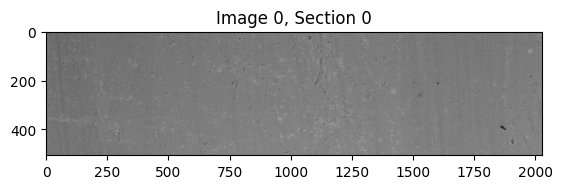

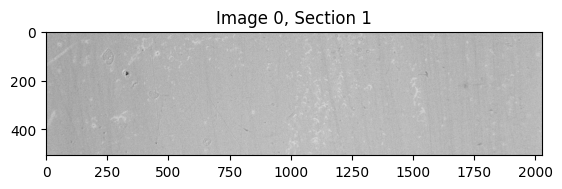

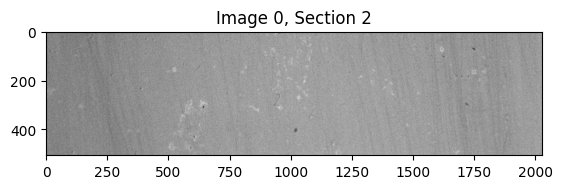

In [20]:
# Define the image index to show
image_idx = 0

# Get an example image from the green stack and its sections to see how its divided
image = red_stack[image_idx]
sections = ratio_sections[image_idx]

for section_idx in range(num_sections):
    section = sections[section_idx]
    plt.imshow(section, cmap="gray")
    plt.title(f'Image {image_idx}, Section {section_idx}')
    plt.show()


In [21]:
# Calculate the mean of means for each image and the standard deviation
ratio_mean_of_means = []
ratio_std_of_means =[]

for i in range(len(ratio_section_means)):
    mean_ratio = np.nanmean(ratio_section_means[i])
    std_ratio = np.nanstd(ratio_section_means[i])
    ratio_mean_of_means.append(mean_ratio)
    ratio_std_of_means.append(std_ratio)

print(ratio_mean_of_means)
print(ratio_std_of_means)

[1.9378442669039684, 1.707456912312887, 1.5640030765631963, 1.4499722986607517, 1.3628249560746528, 1.296562062509535, 1.2377198506357912, 1.1918901041058894, 1.1493447408556, 1.111966248675502, 1.079103581745188, 1.9392482979686498, 1.703062012375699, 1.561339757796567, 1.4480530762921922, 1.3614321752829823, 1.2951719835682232, 1.2369872840597296, 1.1913750680129482, 1.1488778682610927, 1.1117961235978495, 1.0792748798698104, 1.9390215726634132, 1.6988588940819487, 1.558461398033846, 1.446413312834706, 1.3599572159167552, 1.293945697408298, 1.2364288716169007, 1.190791952441839, 1.148676391432119, 1.1115075093678426, 1.079244376254229]
[0.0182496849585577, 0.011407316118969503, 0.008841190471349205, 0.0056892907678565375, 0.005238318623200849, 0.0037220622419169747, 0.0026194790274269137, 0.0021360394368739174, 0.0017170088311534548, 0.001391490348459824, 0.0018398381184979108, 0.01811264794396491, 0.011941462061857299, 0.008970455660018528, 0.0065379518483556906, 0.00526195047216137

In [24]:
# Set the path to the directory containing the image filenames
files_dir = 'D:/O2_Calibration_Images/RAW_2023-09-05/'
files = [f for f in os.listdir(files_dir) if f.endswith('.tiff')]

# Sort filenames to match with stack index
files = natsorted(files)

# Initialize an empty dataframe
df_ratios = pd.DataFrame(columns=['Temperature/O2', 'Intensity Ratio', 'Intensity Red', 'Intensity Green', 'Intensity Blue', 'Std Ratio','Std Red','Std Green', 'Std Blue'])

# Add filenames and corresponding red/green ratio to the dataframe
for i in range(num_images):
    ratio_df = ratio_mean_of_means[i]
    std_df = ratio_std_of_means[i]
    blue_intensity = mean_blue_intensity[i]
    green_intensity = mean_green_intensity[i]
    red_intensity = mean_red_intensity[i]
    blue_std = std_blue_intensity[i]
    green_std = std_green_intensity[i]
    red_std = std_red_intensity[i]
    filename = os.path.splitext(files[i])[0][24:]
    numeric_num = float(filename.replace(",", ".")) 
    df_ratios.loc[i] = [numeric_num, ratio_df, red_intensity, green_intensity, blue_intensity, std_df, red_std, green_std, blue_std]

#df_ratios['Intensity Ratio'] = df_ratios['Intensity Ratio'].round(4)

# Print the dataframe
print(df_ratios)

    Temperature/O2  Intensity Ratio  Intensity Red  Intensity Green  \
0              0.0         1.937844    2397.163129      1236.156118   
1             10.9         1.707457    1935.447641      1133.013886   
2             20.2         1.564003    1687.364432      1078.515779   
3             30.3         1.449972    1508.988059      1040.410006   
4             40.5         1.362825    1381.662875      1013.591378   
5             50.3         1.296562    1287.521848       992.868551   
6             60.6         1.237720    1206.743561       974.867214   
7             70.2         1.191890    1146.510302       961.876594   
8             80.3         1.149345    1092.289775       950.346186   
9             90.2         1.111966    1044.536352       939.383577   
10            99.2         1.079104     999.732900       926.457593   
11             0.0         1.939248    2412.843951      1243.344084   
12            10.9         1.703062    1940.687547      1138.993389   
13    

In [23]:
#Save the DataFrame as a CSV file
df_ratios.to_csv('D:/O2_Calibration_Images/RAW_2023-09-05/red_green_ratio.csv',header=True, index=False, decimal=',')